In [1]:
print("""
@File         : 4-time_series.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-10 21:50:05
@Email        : cuixuanstephen@gmail.com
@Description  : Working with time series data
""")


@File         : 4-time_series.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-10 21:50:05
@Email        : cuixuanstephen@gmail.com
@Description  : Working with time series data



In [2]:
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col="date", parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x['volume'], bins=3, labels=['low', 'med', 'high'])
    )

fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


#### Time-based selection and filtering

In [4]:
fb["2018-10-11": "2018-10-15"]

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


In [8]:
fb.loc['2018-q1'].equals(fb.loc['2018-01': '2018-03'])

True

In [9]:
fb.first("1W")

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\2895274103.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first("1W")


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


In [10]:
fb.last("1W")

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\2941757881.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.last("1W")


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [11]:
fb_reindexed = fb.reindex(
    pd.date_range('2018-01-01', '2018-12-31', freq='D')
)

In [14]:
fb_reindexed.first('1D').isna().squeeze().all()

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\687237223.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb_reindexed.first('1D').isna().squeeze().all()


True

In [15]:
fb_reindexed.loc["2018-Q1"].first_valid_index()

Timestamp('2018-01-02 00:00:00')

In [16]:
fb_reindexed.loc["2018-Q1"].last_valid_index()

Timestamp('2018-03-29 00:00:00')

In [18]:
fb_reindexed.asof('2018-03-31')

open                  155.15
high                  161.42
low                   154.14
close                 159.79
volume            59434293.0
trading_volume           low
Name: 2018-03-31 00:00:00, dtype: object

In [22]:
stock_data_per_minute = pd.read_csv(
    "data/fb_week_of_may_20_per_minute.csv",
    index_col="date", parse_dates=True,
    date_format="%Y-%m-%d %H-%M"
    # date_format=lambda x: pd.to_datetime(x, format="%Y-%m-%d %H-%M")
)

In [23]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


In [24]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first',
    "high": 'max',
    "low": "min",
    "close": 'last',
    "volume": "sum"
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [25]:
stock_data_per_minute.at_time("9:30")

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


In [26]:
stock_data_per_minute.between_time("15:59", "16:00")

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.915,182.915,182.915,182.915,134569.0
2019-05-20 16:00:00,182.720,182.720,182.720,182.720,1113672.0
2019-05-21 15:59:00,184.840,184.840,184.840,184.840,61606.0
2019-05-21 16:00:00,184.820,184.820,184.820,184.820,801080.0
2019-05-22 15:59:00,185.290,185.290,185.290,185.290,96099.0
2019-05-22 16:00:00,185.320,185.320,185.320,185.320,1220993.0
2019-05-23 15:59:00,180.720,180.720,180.720,180.720,109648.0
2019-05-23 16:00:00,180.870,180.870,180.870,180.870,1329217.0
2019-05-24 15:59:00,181.070,181.070,181.070,181.070,52994.0


In [31]:
shares_traded_in_first_30_min = stock_data_per_minute.between_time("9:30", "10:00").groupby(pd.Grouper(freq='1D')).filter(
    lambda x: (x['volume'] > 0).all()
)['volume'].mean()

shares_traded_in_last_30_min = stock_data_per_minute.between_time("15:30", "16:00").groupby(pd.Grouper(freq='1D')).filter(
    lambda x: (x['volume'] > 0).all()
)['volume'].mean()

In [32]:
shares_traded_in_first_30_min - shares_traded_in_last_30_min

18592.967741935485

In [33]:
pd.DataFrame(
    dict(before=stock_data_per_minute.index,
         after=stock_data_per_minute.index.normalize())
).head()

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


In [36]:
stock_data_per_minute.index.to_series().dt.normalize().head()

date
2019-05-20 09:30:00   2019-05-20
2019-05-20 09:31:00   2019-05-20
2019-05-20 09:32:00   2019-05-20
2019-05-20 09:33:00   2019-05-20
2019-05-20 09:34:00   2019-05-20
Name: date, dtype: datetime64[ns]

#### Shifting for lagged data

In [34]:
fb.assign(
    prior_close=lambda x: x['close'].shift(1),
    after_hours_change_in_price=lambda x: x['open'] - x['prior_close'],
    abs_change=lambda x: x['after_hours_change_in_price'].abs()
).nlargest(5, "abs_change")

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [37]:
pd.date_range('2018-01-01', freq="D", periods=5) + pd.Timedelta("9 hours 30 minutes")

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

#### Differenced data

In [39]:
(fb.drop(columns='trading_volume') - fb.drop(columns='trading_volume').shift()).equals(
    fb.drop(columns="trading_volume").diff()
)

True

In [40]:
fb.drop(columns="trading_volume").diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.7800,3.25,-1265340.0
2018-01-04,3.02,1.43,2.7696,-0.34,-3005667.0
2018-01-05,0.69,0.69,0.8304,2.52,-306361.0
2018-01-08,1.61,2.00,1.4000,1.43,4420191.0


In [41]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.3800,-5.43,4577368.0
2018-01-03,-5.32,-4.12,-5.0000,-3.61,-1108163.0
2018-01-04,-3.80,-2.59,-3.0004,-3.54,1487839.0
2018-01-05,-1.35,-0.99,-0.7000,-0.99,3044641.0
2018-01-08,-1.20,0.50,-1.0500,0.51,8406139.0


array([<Axes: title={'center': 'raw data'}, xlabel='date', ylabel='events'>,
       <Axes: title={'center': 'daily totals'}, xlabel='date', ylabel='events'>],
      dtype=object)

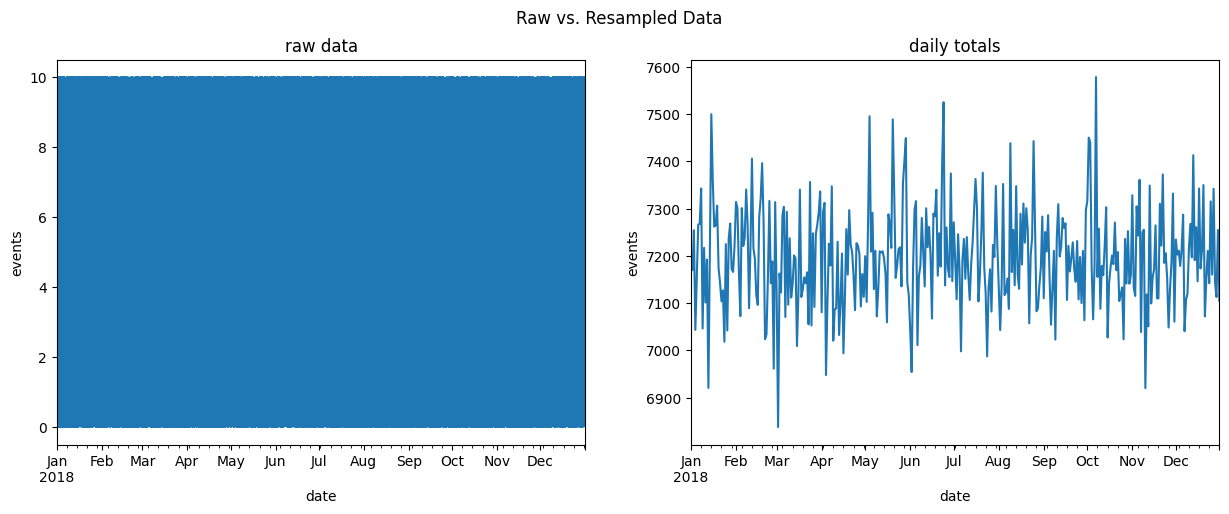

In [46]:
import matplotlib.pyplot as plt

def resampling_example():
    
    index = pd.date_range('2018-01-01', freq="min", periods=365*24*60)
    raw = pd.DataFrame(
        np.random.uniform(0, 10, size=index.shape[0]), index=index
    )
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    raw.plot(ax=axes[0], legend=False, title='raw data')
    raw.resample("1D").sum().plot(legend=False, ax=axes[1], title="daily totals")
    
    for ax in axes:
        ax.set_xlabel("date")
        ax.set_ylabel("events")
    
    plt.suptitle("Raw vs. Resampled Data")
    
    
    return axes

resampling_example()

In [47]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


In [51]:
stock_data_per_minute.resample('1D').agg({
    "open": 'first',
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
})

# stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [54]:
fb.drop(columns="trading_volume").resample("QE").mean()

,open,high,low,close,volume
date,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,3.292640e+07
2018-06-30,180.373770,182.277689,178.595964,180.704688,2.405532e+07
2018-09-30,180.812130,182.890886,178.955229,181.028492,2.701982e+07
2018-12-31,145.272460,147.620121,142.718943,144.868730,2.697433e+07


In [59]:
fb.drop(columns='trading_volume').resample('QE').apply(
    lambda x: pd.Series(x.last("1D").values) - pd.Series(x.first('1D').values)
)

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\2929357508.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: pd.Series(x.last("1D").values) - pd.Series(x.first('1D').values)
C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\2929357508.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: pd.Series(x.last("1D").values) - pd.Series(x.first('1D').values)
C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\2929357508.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: pd.Series(x.last("1D").values) - pd.Series(x.first('1D').values)
C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_12800\2929357508.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and fil

,open,high,low,close,volume
date,,,,,
2018-03-31,-22.53,-20.1600,-23.410,-21.63,41282390
2018-06-30,39.51,38.3997,39.844,38.93,-20984389
2018-09-30,-25.04,-28.6600,-29.660,-32.90,20304060
2018-12-31,-28.58,-31.2400,-31.310,-31.35,-1782369


In [60]:
melted_stock_data = pd.read_csv(
    "data/melted_stock_data.csv",
    index_col="date", parse_dates=True
)

melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


In [61]:
melted_stock_data.resample("1D")['price'].ohlc()

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


In [64]:
melted_stock_data.resample("1D").ohlc()

price                            
              open      high       low   close
date                                          
2019-05-20  181.62  184.1800  181.6200  182.72
2019-05-21  184.53  185.5800  183.9700  184.82
2019-05-22  184.81  186.5603  184.0120  185.32
2019-05-23  182.50  183.7300  179.7559  180.87
2019-05-24  182.33  183.5227  181.0400  181.06

In [67]:
fb.resample("6h").asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low
